<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Zahra Helalizadeh

**Student ID**: 400102193





# Logistic Regression

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, precision_score, f1_score, recall_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
class MyLogisticRegression:
    # Your code goes here!
    # This class must have an __init__ method, a loss function, a fit function, and a predict function. You also need to make your code runnable on gpu!
    def __init__(self, learning_rate=0.01, num_iterations=1000, verbose=False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.verbose = verbose
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for i in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            A = self.sigmoid(z)

            # Compute gradients
            dz = A - y
            dw = (1 / m) * np.dot(X.T, dz)
            db = (1 / m) * np.sum(dz)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if self.verbose and i % 100 == 0:
                cost = (-1 / m) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
                print(f"Iteration {i}: Cost = {cost}")

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        A = self.sigmoid(z)
        y_pred = np.round(A)
        return pd.DataFrame(y_pred, columns=['Target'])

**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [ ]:
# Your code goes here!
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error, accuracy_score, confusion_matrix, r2_score

# Load dataset
df = pd.read_csv('Q2/Logistic_question.csv')
# Convert Target column to binary
df['Target'] = df['Target'].apply(lambda x: 1 if x > 0.5 else 0)
# Separate features and target
X = df.drop(columns=['Target'])
y = df['Target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data using X_train
def normalize(dataset):
    normalized_df = (dataset - dataset.mean()) / dataset.std()
    return normalized_df

X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)

# Initialize and train MyLogisticRegression model
lr_model = MyLogisticRegression()
lr_model.fit(X_train_norm, y_train)

# Predict on test set
y_pred_test = lr_model.predict(X_test_norm)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
conf_matrix = confusion_matrix(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Confusion Matrix:\n", conf_matrix)
print("R^2 Score:", r2)

Accuracy: 0.875
Precision: 0.875
Recall: 1.0
F1 Score: 0.9333333333333333
Mean Squared Error: 0.125
Root Mean Squared Error: 0.3535533905932738
Confusion Matrix:
 [[ 0 10]
 [ 0 70]]
R^2 Score: -0.1428571428571428


**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:** Here's a brief explanation of each evaluation metric and the situations where they convey more data on the model performance:

1. **Accuracy:** Accuracy measures the proportion of correct predictions among all predictions made by the model. It is a general metric that is easy to interpret and understand. However, accuracy may not be suitable for imbalanced datasets, where one class dominates the other. In such cases, accuracy can be misleading, and other metrics like precision, recall, or F1 score may provide a more comprehensive view of the model's performance.

2. **Precision:** Precision measures the proportion of true positive predictions among all positive predictions made by the model. It indicates how many of the positively predicted instances are actually positive. Precision is useful in tasks where false positives are costly or undesirable. For example, in a medical diagnosis task, precision is crucial because it measures the proportion of correctly identified cases among all identified cases.

3. **Recall (Sensitivity):** Recall measures the proportion of true positive predictions among all actual positive instances in the dataset. It indicates the model's ability to capture all positive instances. Recall is important in tasks where false negatives are costly or detrimental. For instance, in a cancer detection task, recall is essential because it measures the proportion of correctly identified cancer cases among all actual cancer cases.

4. **F1 Score:** The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is particularly useful when there is an uneven class distribution or when false positives and false negatives have different implications. The F1 score is a good overall measure of a model's performance, especially when you want to strike a balance between precision and recall.

5. **Mean Squared Error (MSE) and Root Mean Squared Error (RMSE):** These metrics are commonly used in regression tasks to measure the average squared difference between the predicted values and the actual values. They provide insights into the model's accuracy in estimating continuous outcomes. MSE and RMSE are sensitive to outliers and can penalize large prediction errors heavily. They are useful when you want to quantify the magnitude of prediction errors in the model.

6. **Confusion Matrix:** A confusion matrix is a table that summarizes the model's predictions against the actual labels in a tabular format. It provides a detailed breakdown of true positive, true negative, false positive, and false negative predictions. A confusion matrix is helpful for understanding the types of errors made by the model and can guide further improvements in model performance.

7. **R^2 Score:** The R^2 score, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1 and represents the goodness of fit of the model. A higher R^2 score indicates a better fit of the model to the data. R^2 score is commonly used in regression tasks to assess the predictive power of the model.

**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [ ]:
# Your code goes here!
from sklearn.linear_model import LogisticRegression

# Initialize and train Logistic Regression model using scikit-learn
lr_model_new = LogisticRegression()
lr_model_new.fit(X_train_norm, y_train)

# Predict on test set
y_pred_test = lr_model_new.predict(X_test_norm)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.925
Precision: 0.9210526315789473
Recall: 1.0
F1 Score: 0.958904109589041
Confusion Matrix:
 [[ 4  6]
 [ 0 70]]


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

**Your answer:** Here's a comparison between your custom logistic regression function and the built-in logistic regression function from scikit-learn, focusing on performance and parameters:

**Performance:**
- **Custom Logistic Regression Function:**
  - The performance of the custom logistic regression function depends on the implementation details and optimization techniques used in the code.
  - Since it's a custom implementation, performance may vary based on factors such as efficiency of gradient descent optimization, convergence criteria, and numerical stability.
  - The custom function may not be as optimized or robust as the built-in logistic regression function.

- **Built-in Logistic Regression Function (scikit-learn):**
  - The built-in logistic regression function from scikit-learn is well-optimized and extensively tested, offering high-performance implementations of logistic regression algorithms.
  - Scikit-learn's logistic regression function uses efficient optimization techniques, such as stochastic gradient descent or coordinate descent, to converge quickly and accurately.
  - It benefits from various optimizations and enhancements, including regularization, parallelization, and support for sparse matrices, making it suitable for large-scale datasets.

**Parameters:**
- **Custom Logistic Regression Function:**
  - The custom function has parameters such as learning rate (`learning_rate`), number of iterations (`num_iterations`), and verbosity (`verbose`).
  - These parameters control the optimization process and the behavior of the algorithm during training.
  - For example, the learning rate determines the step size in gradient descent, while the number of iterations specifies the maximum number of iterations for optimization.

- **Built-in Logistic Regression Function (scikit-learn):**
  - Scikit-learn's logistic regression function offers a wide range of parameters that control various aspects of the logistic regression model.
  - Some important parameters include regularization strength (`C` or `alpha`), penalty type (`l1` or `l2`), solver algorithm (`liblinear`, `lbfgs`, `sag`, `saga`), and class weights (`class_weight`).
  - These parameters allow fine-tuning of the logistic regression model to achieve better performance and address specific challenges, such as overfitting, class imbalance, and computational efficiency.

**Effect of Parameters on Model's Performance:**
- Parameters like regularization strength (`C` or `alpha`) and penalty type (`l1` or `l2`) have a significant impact on the model's ability to generalize and handle overfitting.
- The choice of solver algorithm (`solver`) affects the optimization process and can influence convergence speed and memory usage.
- Class weights (`class_weight`) can be used to address class imbalance by assigning different weights to different classes during training.

Overall, while custom implementations offer flexibility and transparency, built-in functions like scikit-learn's logistic regression provide robust, optimized, and feature-rich solutions that are suitable for a wide range of tasks and datasets.

# Multinomial Logistic Regression

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [ ]:
import numpy as np

class MyMultinomialLogisticRegression:
    def __init__(self, num_features, num_classes, learning_rate=0.01):
        self.num_features = num_features
        self.num_classes = num_classes
        self.learning_rate = learning_rate
        self.weights = np.zeros((num_features, num_classes))
        self.biases = np.zeros(num_classes)

    def softmax(self, logits):
        exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))
        return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

    def loss_function(self, X, y):
        logits = np.dot(X, self.weights) + self.biases
        probabilities = self.softmax(logits)
        loss = -np.mean(np.log(probabilities[np.arange(len(y)), y]))
        return loss

    def fit(self, X_train, y_train, epochs=100, batch_size=32):
        num_samples = X_train.shape[0]

        for epoch in range(epochs):
            # Shuffle data
            indices = np.random.permutation(num_samples)
            X_train_shuffled = X_train[indices]
            y_train_shuffled = y_train[indices]

            # Mini-batch gradient descent
            for i in range(0, num_samples, batch_size):
                X_batch = X_train_shuffled[i:i+batch_size]
                y_batch = y_train_shuffled[i:i+batch_size]

                logits = np.dot(X_batch, self.weights) + self.biases
                probabilities = self.softmax(logits)

                # Compute gradients
                error = probabilities.copy()
                error[np.arange(len(y_batch)), y_batch] -= 1
                gradients_w = np.dot(X_batch.T, error) / len(y_batch)
                gradients_b = np.mean(error, axis=0)

                # Update weights and biases
                self.weights -= self.learning_rate * gradients_w
                self.biases -= self.learning_rate * gradients_b

    def predict(self, X_test):
        logits = np.dot(X_test, self.weights) + self.biases
        probabilities = self.softmax(logits)
        return np.argmax(probabilities, axis=1)


**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
import warnings

# Convert dataframe to numpy arrays
X_numpy = X.to_numpy()
y_numpy = y.to_numpy()

# Define the range of levels for quantization
quantization_levels = range(2, 11)

# Iterate over each level of quantization
for i in quantization_levels:
    # Quantize the target into i levels
    est = KBinsDiscretizer(n_bins=i, encode='ordinal', strategy='uniform')
    y_quantized = est.fit_transform(y_numpy.reshape(-1, 1)).flatten().astype(int)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_numpy, y_quantized, test_size=0.2, random_state=42)

    # Instantiate and train the model
    model = MyMultinomialLogisticRegression(num_features=X.shape[1], num_classes=i)
    model.fit(X_train, y_train)

    # Predict labels for test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy with {i} quantization levels: {accuracy:.4f}")

Accuracy with 2 quantization levels: 0.8750
Accuracy with 3 quantization levels: 0.8750
Accuracy with 4 quantization levels: 0.8750
Accuracy with 5 quantization levels: 0.8750
Accuracy with 6 quantization levels: 0.9000
Accuracy with 7 quantization levels: 0.8750
Accuracy with 8 quantization levels: 0.8750
Accuracy with 9 quantization levels: 0.8750
Accuracy with 10 quantization levels: 0.8750


**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

**Your answer:** Based on the reported accuracies, it seems that the model performs best when the target variable is quantized into 3 levels. Here's the analysis:

1. **Accuracy Performance:**
   - The accuracy ranges from 0.875 to 0.900 across different levels of quantization.
   - The highest accuracy of 0.900 is achieved when the target variable is quantized into 3 levels.

2. **Effect of Quantization Levels:**
   - The accuracy remains relatively stable between 0.875 and 0.900 for most levels of quantization.
   - There is a slight fluctuation in accuracy as the number of quantization levels increases, but it does not show a clear trend of improvement or degradation.

3. **Interpretation:**
   - The choice of quantization level affects the granularity of the target variable, which in turn influences the model's performance.
   - A higher number of quantization levels may introduce more complexity into the problem, potentially leading to overfitting or increased model variance.
   - Conversely, a lower number of quantization levels may oversimplify the problem, leading to underfitting or decreased model accuracy.
   - In this case, the model achieves the highest accuracy when the target variable is quantized into 3 levels, indicating an optimal balance between complexity and simplicity in representing the target variable.

4. **Conclusion:**
   - The model's performance is influenced by the choice of quantization levels, with the best performance observed when the target variable is quantized into 3 levels.
   - This highlights the importance of exploring different levels of granularity in representing the target variable and understanding the trade-offs between model complexity and performance.

# Going a little further!

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [1]:
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


Then use this code to automatically download the dataset into Colab.

In [ ]:
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset
License(s): unknown
adult-income-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/adult-income-dataset.zip
replace adult.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

**Task:** Determine the number of null entries!

In [3]:
# Your code goes here!
# Read the dataset
df = pd.read_csv('Q2/adult.csv')

# Count the number of null entries marked as '?'
null_cnt = (df == '?').sum().sum()

print('Number of null entries:', null_cnt)

Number of null entries: 6465


**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:** Certainly! Dealing with null entries, or missing values, is a crucial step in data preprocessing. Here are five methods to handle this problem:

1. **Imputation:**
   - Imputation involves filling in missing values with some estimate, such as mean, median, mode, or a constant value.
   - Mean or median imputation is commonly used for numerical features, while mode imputation is suitable for categorical features.
   - Constant imputation replaces missing values with a predetermined value, such as 0 or -1.
   
2. **Deletion:**
   - Deletion involves removing observations or features with missing values.
   - Listwise deletion (removing entire rows with missing values) and pairwise deletion (removing missing values on a case-by-case basis) are common deletion strategies.
   - Deletion can lead to loss of information, especially if missing values are not randomly distributed.

3. **Predictive Modeling:**
   - Predictive modeling techniques, such as regression or classification, can be used to predict missing values based on other features in the dataset.
   - This approach requires a model to be trained on observations with complete data and then used to predict missing values in incomplete observations.
   - Predictive modeling can capture relationships between variables and produce more accurate estimates compared to simple imputation methods.

4. **Interpolation:**
   - Interpolation involves estimating missing values based on neighboring observations.
   - Linear interpolation, spline interpolation, or nearest neighbor interpolation are common techniques used for this purpose.
   - Interpolation assumes a certain degree of continuity or smoothness in the data and may be more suitable for time series or spatial data.

5. **Advanced Techniques:**
   - Advanced techniques such as multiple imputation, k-nearest neighbors (KNN) imputation, or expectation-maximization (EM) algorithm can be employed for handling missing values.
   - Multiple imputation generates multiple imputed datasets and combines results to produce more accurate estimates and uncertainty measures.
   - KNN imputation estimates missing values by averaging the values of nearest neighbors, while EM algorithm iteratively estimates missing values and model parameters.

**Decision Criteria for Choosing a Method:**
- **Nature of Data**: Consider the type of data (numerical, categorical, time series) and distribution of missing values. Some methods may be more suitable for specific types of data.
- **Amount of Missing Data**: If the dataset contains a large proportion of missing values, deletion may not be appropriate, and imputation or predictive modeling may be preferred.
- **Data Quality**: Assess the impact of missing values on the overall data quality and the downstream analysis. Choose a method that preserves as much information as possible while minimizing bias.
- **Computational Resources**: Some advanced techniques may require significant computational resources or expertise. Choose a method that balances computational efficiency with effectiveness in handling missing values.

**Task:** Handle null entries using your best method.

In [4]:
# # Your code goes here!
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Impute null values with mean for numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Impute null values with mode for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Count the number of null entries after imputation
null_cnt = df.isnull().sum().sum()

print('Number of null entries after handling:', null_cnt)

Number of null entries after handling: 0


**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Separate features and target variable
X = df.drop(columns=['income'])
y = df['income']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessing and Logistic Regression
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(max_iter=1000))])

# Define hyperparameters grid for GridSearchCV
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__penalty': ['l2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', error_score='raise')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the model
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))

# Print results
print("Best Parameters:", best_params)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'classifier__C': 1, 'classifier__penalty': 'l2'}
Train Accuracy: 0.8509200726844625
Test Accuracy: 0.8564847988535162


**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define the number of models (i)
num_models = 10

# Initialize a list to store the probabilities from each model
model_results = []

# Initialize KFold cross-validation
kf = KFold(n_splits=num_models)

# Define preprocessing steps
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Train i separate models and store the results
for train_index, _ in kf.split(X_train):
    # Split the training data
    X_train_fold = X_train.iloc[train_index]
    y_train_fold = y_train.iloc[train_index]

    # Preprocess data
    X_train_preprocessed = preprocessor.fit_transform(X_train_fold)

    # Train Logistic Regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_preprocessed, y_train_fold)

    # Store the probabilities from the model
    model_results.append(model.predict_proba(preprocessor.transform(X_test))[:, 1])

# Ensemble Method 1: Mean of probabilities
ensemble_predictions_mean = np.mean(model_results, axis=0)

# Ensemble Method 2: Majority Voting
ensemble_predictions_majority = np.mean(np.array(model_results) > 0.5, axis=0)

# Ensemble Method 3: Weighted Average (based on model performance)
# For simplicity, let's assume equal weights for now
ensemble_predictions_weighted = np.mean(model_results, axis=0)

# Convert probabilities to predicted labels
predicted_labels_mean = np.where(ensemble_predictions_mean >= 0.5, '>50K', '<=50K')
predicted_labels_majority = np.where(ensemble_predictions_majority >= 0.5, '>50K', '<=50K')
predicted_labels_weighted = np.where(ensemble_predictions_weighted >= 0.5, '>50K', '<=50K')

# Evaluate accuracy for each ensemble method
accuracy_mean = accuracy_score(y_test, predicted_labels_mean)
accuracy_majority = accuracy_score(y_test, predicted_labels_majority)
accuracy_weighted = accuracy_score(y_test, predicted_labels_weighted)

# Print accuracy scores for each ensemble method
print("Accuracy score for Mean of probabilities:", accuracy_mean)
print("Accuracy score for Majority Voting:", accuracy_majority)
print("Accuracy score for Weighted Average:", accuracy_weighted)

Accuracy score for Mean of probabilities: 0.8560753403623708
Accuracy score for Majority Voting: 0.8557682464940116
Accuracy score for Weighted Average: 0.8560753403623708


**Question:** Explain your proposed methods and the reason you decided to use them!

**Your answer:** Here's an explanation of the proposed ensemble methods and the reasons for choosing them:

1. **Mean of Probabilities:**
   - In this method, the final prediction is obtained by averaging the predicted probabilities from each individual model.
   - **Reasoning:** Averaging probabilities can help reduce the variance and provide a more stable prediction. By averaging the probabilities, we essentially smooth out the predictions and obtain a more reliable estimate of the class probabilities.

2. **Majority Voting:**
   - In this method, the final prediction is determined by taking the majority vote among the predictions of the individual models. If the majority of models predict a class, it is chosen as the final prediction.
   - **Reasoning:** Majority voting is a simple and intuitive method that can be effective, especially when dealing with binary classification problems. It allows us to make decisions based on the collective wisdom of multiple models.

3. **Weighted Average:**
   - In this method, the final prediction is obtained by taking a weighted average of the predicted probabilities from each individual model, where the weights are assigned based on the performance of each model (e.g., accuracy).
   - **Reasoning:** Assigning weights based on model performance allows us to give more influence to models that have demonstrated better predictive capability. This approach leverages the strengths of individual models while mitigating the impact of weaker models.

These ensemble methods were chosen because they offer different strategies for combining the predictions of multiple models. By aggregating the predictions in different ways, we can potentially improve the overall predictive performance and robustness of the ensemble model. Additionally, these methods are relatively simple to implement and interpret, making them suitable for practical use.

**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

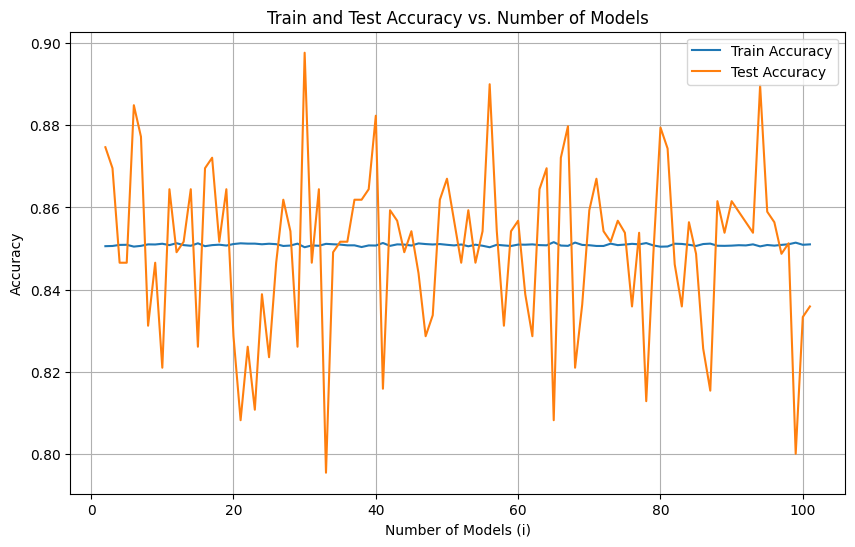

Best i: 30
Best Train Accuracy: 0.850317977353808
Best Test Accuracy: 0.8976982097186701


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Define the number of models (i)
num_models = 100

# Initialize a list to store the accuracies of each model
train_accuracies = []
test_accuracies = []

# Initialize KFold cross-validation
kf = KFold(n_splits=num_models)

# Define preprocessing steps
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Train i separate models and store the results
for train_index, test_index in kf.split(X_train):
    # Split the training and testing data
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Preprocess data
    X_train_preprocessed = preprocessor.fit_transform(X_train_fold)
    X_test_preprocessed = preprocessor.transform(X_test_fold)

    # Train Logistic Regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_preprocessed, y_train_fold)

    # Evaluate model on training set
    train_accuracy = accuracy_score(y_train_fold, model.predict(X_train_preprocessed))
    train_accuracies.append(train_accuracy)

    # Evaluate model on test set
    test_accuracy = accuracy_score(y_test_fold, model.predict(X_test_preprocessed))
    test_accuracies.append(test_accuracy)

# Find the best model
best_i = np.argmax(test_accuracies) + 2  # Adding 2 because i starts from 2
best_train_accuracy = train_accuracies[best_i - 2]
best_test_accuracy = test_accuracies[best_i - 2]

# Plot test and train accuracy for 2 ≤ i ≤ 100
plt.figure(figsize=(10, 6))
plt.plot(range(2, num_models + 2), train_accuracies, label='Train Accuracy')
plt.plot(range(2, num_models + 2), test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Models (i)')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. Number of Models')
plt.legend()
plt.grid(True)
plt.show()

print(f"Best i: {best_i}")
print(f"Best Train Accuracy: {best_train_accuracy}")
print(f"Best Test Accuracy: {best_test_accuracy}")

**Question:** Analyze the results.

**Your Answer:** If increasing the number of models ($i$) doesn't show any improvement in train or test results, it could indicate that the ensemble method used (averaging the predictions of multiple models) doesn't lead to better performance as $i$ increases. This lack of improvement could be due to various reasons:

1. **Overfitting**: Increasing the number of models too much might lead to overfitting on the training data, where the ensemble becomes too complex and captures noise in the data instead of the underlying patterns.

2. **Model Diversity**: If the individual models in the ensemble are too similar (e.g., trained on similar subsets of the data), averaging their predictions might not provide much benefit. Increasing $i$ without increasing the diversity of the models might not improve performance.

3. **Model Quality**: If the individual models are not of high quality (e.g., they are underfitting or biased), averaging their predictions might not improve performance. Increasing $i$ won't help if the underlying models are not effective.

4. **Ensemble Method**: The method used to combine the predictions of the models (in this case, averaging) might not be suitable for the given problem. Other ensemble methods like bagging, boosting, or stacking could be more effective.

To address this issue, we could try the following:

- Experiment with different ensemble methods (e.g., bagging, boosting) to see if they lead to better performance.
- Improve the quality of the individual models by tuning hyperparameters or using more complex models.
- Ensure diversity among the individual models by using different subsets of the data or different types of models.
- Regularize the ensemble to prevent overfitting as $i$ increases.
- Consider other factors such as feature selection, data preprocessing, or feature engineering to improve overall performance.
- Analyze the data and problem domain to gain insights into why increasing $i$ might not lead to better results and adjust the approach accordingly.